# A Time-Series Analysis on the Philippines' Inflation Rate from 1960 to 2021
## (With the terms' corresponding president)

Von Stephen Carandang
Andre Mhiko Carandang
Gianello Montenegro
Mikaela Raymundo

BSECE - T4A

Date Submitted

Submitted To: Engr. Aisa Mijeno-Labastilla, PCpE

**Major Assessment 3 / Capstone Assessment**

**Training and Evaluation of the Gathered Data**

**First Semester SY 2023-2024**

**I.	Introduction / Problem Statement**
• Describe the problem you are trying to give a solution in doing the training and evaluation of the gathered data. State what SDG you are targeting 

**II.	Review of Related Literature**
• Describe here the technical know-how that you learned and researched related to your problem, 

**III.	Gathered Data / Dataset**
• Describe here your dataset (type, size, repositories, links, etc.)
• Link to the shared dataset
"TEMPORARY DATASET: https://fred.stlouisfed.org/series/FPCPITOTLZGPHL"

**IV. Objectives**
• State here the main objective and the specific objectives to achieve the main objective

**V. Conceptual**
• Describe here how you will manipulate your data to achieve the main objective of training and evaluating the gathered data

**VI. Data and Results**
• Discuss here the results of each conducted training and evaluation

**VII. Conclusion**
• Must be parallel with the objectives

**VIII. Share your thoughts individually and overall feedback after completing this course.** 

**IX. Program Codes (Jupyter notebook)**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import sklearn
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
df_inflation = pd.read_csv('Philippine_Inflation.csv')
df_inflation.info

<bound method DataFrame.info of           DATE  FPCPITOTLZGPHL
0   1960-01-01        4.154822
1   1961-01-01        1.595633
2   1962-01-01        5.796652
3   1963-01-01        5.625549
4   1964-01-01        8.183079
..         ...             ...
58  2018-01-01        5.309347
59  2019-01-01        2.392065
60  2020-01-01        2.393162
61  2021-01-01        3.927180
62  2022-01-01        5.821158

[63 rows x 2 columns]>

In [4]:
df_debt = pd.read_csv('Debt data\Philippines, External debt stocks, total (DOD, current US$).csv')
df_debt.info

<bound method DataFrame.info of     Date         Value
0   1960           NaN
1   1961           NaN
2   1962           NaN
3   1963           NaN
4   1964           NaN
..   ...           ...
59  2019  8.362534e+10
60  2020  9.849369e+10
61  2021  1.064280e+11
62  2022           NaN
63  2023           NaN

[64 rows x 2 columns]>

In [5]:
df_inflation.isnull().sum()

DATE              0
FPCPITOTLZGPHL    0
dtype: int64

In [6]:
df_debt.isnull().sum()

Date      0
Value    12
dtype: int64

In [7]:
df_debt = df_debt.fillna(0)
df_debt.head()

,Date,Value
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0


In [8]:
df_debt.rename(columns={'Value' : 'Debt'}, inplace=True)
df_debt.head()

,Date,Debt
0,1960,0.0
1,1961,0.0
2,1962,0.0
3,1963,0.0
4,1964,0.0


In [9]:
df_inflation.rename(columns={'DATE': 'Year', 'FPCPITOTLZGPHL': 'Inflation Rate'}, inplace=True)
df_inflation.head()

,Year,Inflation Rate
0,1960-01-01,4.154822
1,1961-01-01,1.595633
2,1962-01-01,5.796652
3,1963-01-01,5.625549
4,1964-01-01,8.183079


In [10]:
df_inflation['Year'] = pd.to_datetime(df_inflation['Year']).dt.year
df_inflation.head()

,Year,Inflation Rate
0,1960,4.154822
1,1961,1.595633
2,1962,5.796652
3,1963,5.625549
4,1964,8.183079


In [11]:
debt_list = df_debt['Debt'].tolist()
df_inflation['Debt'] = debt_list[:-1]
df_inflation.head(70)

,Year,Inflation Rate,Debt
0,1960,4.154822,0.000000e+00
1,1961,1.595633,0.000000e+00
2,1962,5.796652,0.000000e+00
3,1963,5.625549,0.000000e+00
4,1964,8.183079,0.000000e+00
...,...,...,...
58,2018,5.309347,7.896729e+10
59,2019,2.392065,8.362534e+10
60,2020,2.393162,9.849369e+10
61,2021,3.927180,1.064280e+11


In [12]:
df_inflation = df_inflation.drop(df_inflation.index[-1])
df_inflation.head(70)

,Year,Inflation Rate,Debt
0,1960,4.154822,0.000000e+00
1,1961,1.595633,0.000000e+00
2,1962,5.796652,0.000000e+00
3,1963,5.625549,0.000000e+00
4,1964,8.183079,0.000000e+00
...,...,...,...
57,2017,2.853188,7.310568e+10
58,2018,5.309347,7.896729e+10
59,2019,2.392065,8.362534e+10
60,2020,2.393162,9.849369e+10


In [13]:
df_inflation['Debt'] = df_inflation['Debt'].astype(float)
pd.options.display.float_format = '{:.2f}'.format
df_inflation.head(70)

,Year,Inflation Rate,Debt
0,1960,4.15,0.00
1,1961,1.60,0.00
2,1962,5.80,0.00
3,1963,5.63,0.00
4,1964,8.18,0.00
...,...,...,...
57,2017,2.85,73105675383.00
58,2018,5.31,78967285430.00
59,2019,2.39,83625343901.00
60,2020,2.39,98493687903.00


In [14]:
def format_currency(x):
    if x >= 1e9:
        return x*1e-9
    elif x >= 1e6:
        return x*1e-6
    elif x >= 1e3:
        return x*1e-3
    else:
        return x

df_inflation['Debt'] = df_inflation['Debt'].apply(format_currency)
df_inflation.head(70)

,Year,Inflation Rate,Debt
0,1960,4.15,0.00
1,1961,1.60,0.00
2,1962,5.80,0.00
3,1963,5.63,0.00
4,1964,8.18,0.00
...,...,...,...
57,2017,2.85,73.11
58,2018,5.31,78.97
59,2019,2.39,83.63
60,2020,2.39,98.49


<BarContainer object of 62 artists>

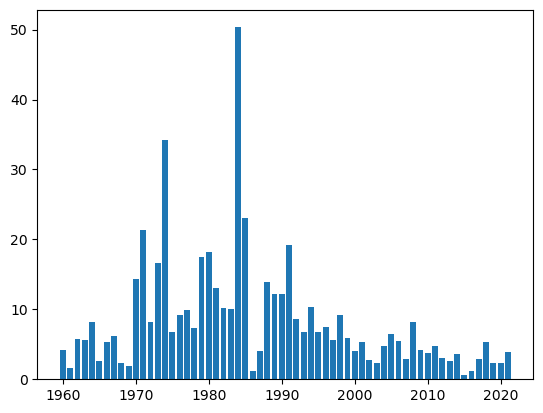

In [15]:
plt.bar(df_inflation['Year'], df_inflation['Inflation Rate'])

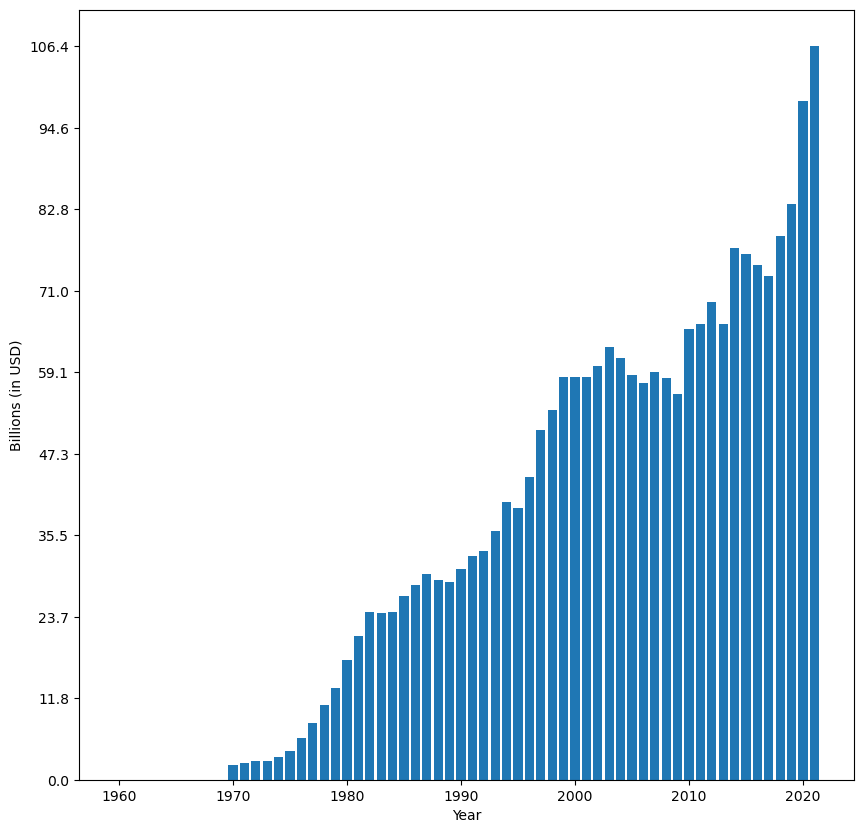

In [16]:
plt.figure(figsize=(10, 10))
plt.bar(df_inflation['Year'], df_inflation['Debt'])
plt.ylabel('Billions (in USD)')
plt.xlabel('Year')

# Specify yticks
yticks = np.linspace(start=min(df_inflation['Debt']), stop=max(df_inflation['Debt']), num=10)
plt.yticks(yticks)

plt.show()

<Axes: xlabel='Inflation Rate', ylabel='Count'>

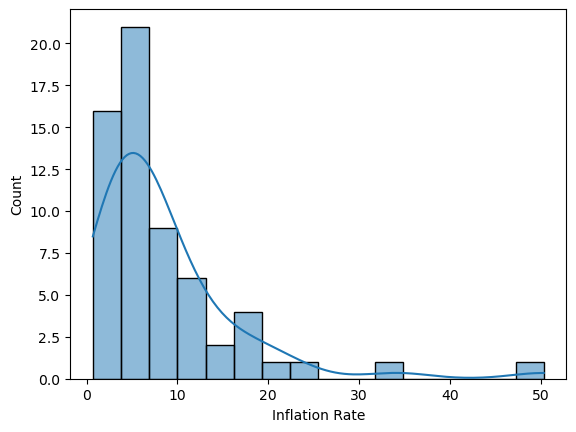

In [17]:
sns.histplot(df_inflation['Inflation Rate'], kde=True)

<Axes: xlabel='Debt', ylabel='Count'>

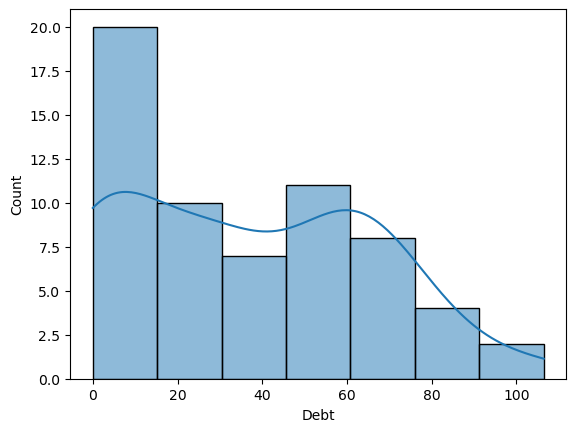

In [18]:
sns.histplot(df_inflation['Debt'], kde=True)

In [19]:
# dictionary of presidents and their years in office
pres_dict = {
    'C. Garcia': [1960],
    'D. Macapagal': list(range(1961, 1965)),
    'F. Marcos': list(range(1965, 1986)),
    'C. Aquino': list(range(1986, 1992)),
    'F. Ramos': list(range(1992, 1998)),
    'J. Estrada': list(range(1998, 2001)),
    'G. Arroyo': list(range(2001, 2010)),
    'B. Aquino': list(range(2010, 2016)),
    'R. Duterte': list(range(2016, 2022)),
    'B. Marcos': [2021]
}

def get_president(year):
    for president, years in pres_dict.items():
        if year in years:
            return president
    return None

df_inflation['President'] = df_inflation['Year'].apply(get_president)
df_inflation.head()

,Year,Inflation Rate,Debt,President
0,1960,4.15,0.00,C. Garcia
1,1961,1.60,0.00,D. Macapagal
2,1962,5.80,0.00,D. Macapagal
3,1963,5.63,0.00,D. Macapagal
4,1964,8.18,0.00,D. Macapagal


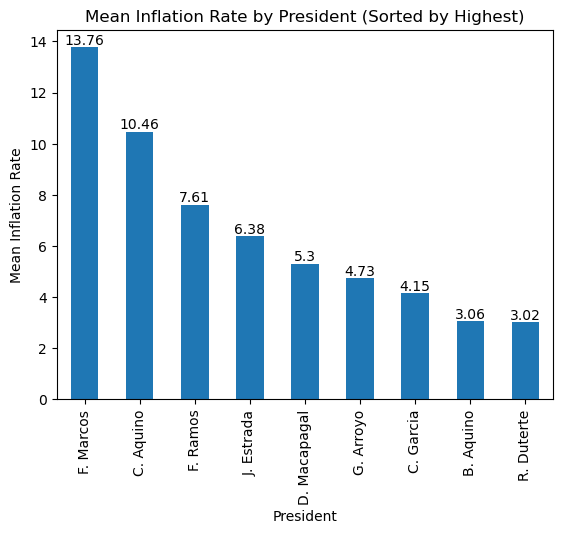

In [20]:
mean_inflation = df_inflation.groupby('President')['Inflation Rate'].mean().sort_values(ascending=False)
mean_inflation.plot(kind='bar')
mean_inflation.head()

plt.title('Mean Inflation Rate by President (Sorted by Highest)')
plt.xlabel('President')
plt.ylabel('Mean Inflation Rate')

# Add values to each bar
for i, value in enumerate(mean_inflation):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()


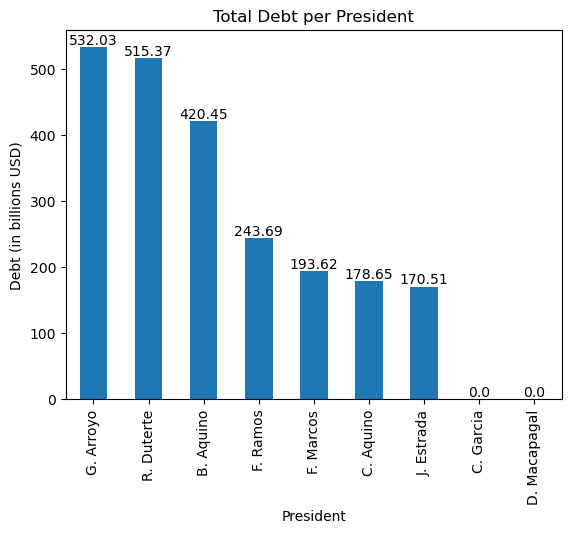

In [22]:
debt_per_president = df_inflation.groupby('President')['Debt'].sum().sort_values(ascending=False)
debt_per_president.plot(kind='bar')

plt.title('Total Debt per President')
plt.xlabel('President')
plt.ylabel('Debt (in billions USD)')

# Add values to each bar
for i, value in enumerate(debt_per_president):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

plt.show()



In [23]:
print('Hello World')

Hello World
